# Week11 - Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

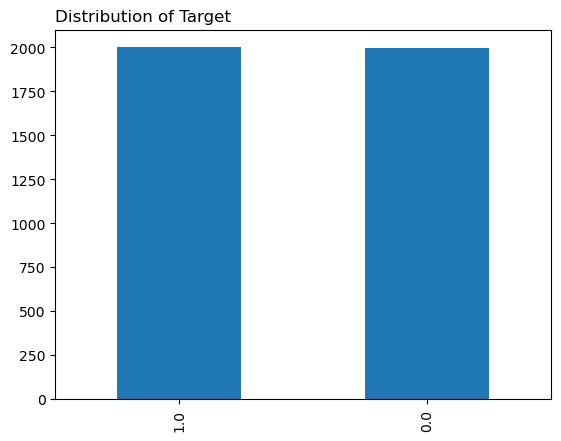

In [4]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

In [6]:

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
X_train_encoded = pd.get_dummies(X_train, columns=['var0', 'var1', 'var2'], drop_first=True)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)

In [9]:
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=2303)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)


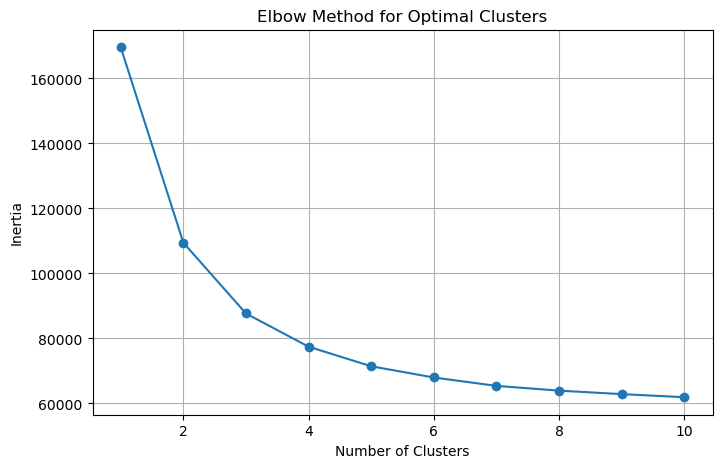

In [10]:
if len(inertia) != len(cluster_range):
    print("Error: Mismatch in cluster range and inertia size.")
    print(f"Cluster range: {len(cluster_range)}, Inertia: {len(inertia)}")
    raise ValueError("Cluster range and inertia size mismatch.")

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

The elbow shape is formed near 2 clusters 

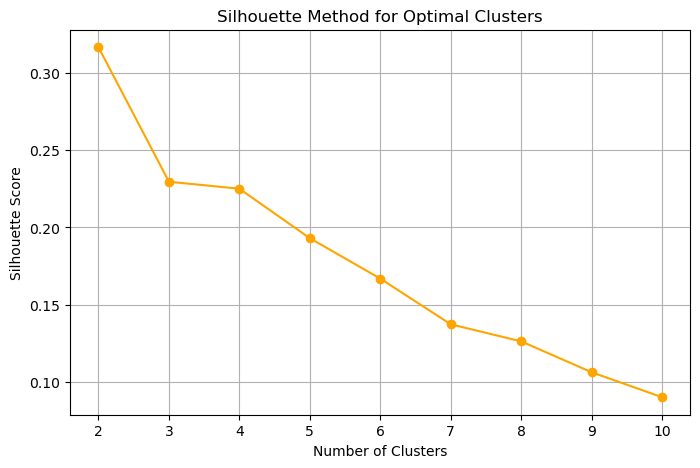

In [11]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#  silhouette scores for different cluster numbers
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=2303)
    kmeans.fit(X_train_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_train_scaled, labels))

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

The Silhouette Score is highest for 2 clusters (around 0.31) and decreases as the number of clusters increases.

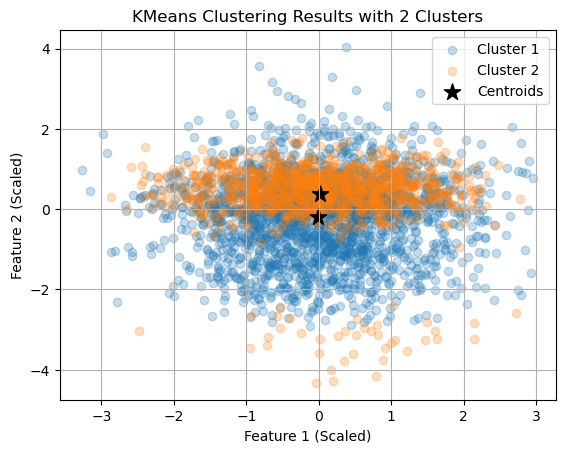

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Setting the number of clusters
n = 2

# Performing KMeans clustering
kmeans = KMeans(n_clusters=n, random_state=2303, n_init=10)
kmeans = kmeans.fit(X_train_scaled)
pclusters = kmeans.predict(X_train_scaled)

# Plotting points for each cluster
for i in range(n):
    plt.scatter(X_train_scaled[pclusters == i, 0], X_train_scaled[pclusters == i, 1], alpha=0.25, label=f'Cluster {i+1}')

# Plotting the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='*', s=150, label='Centroids')

# Adding title, labels, and legend
plt.title(f'KMeans Clustering Results with {n} Clusters')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid()
plt.show()


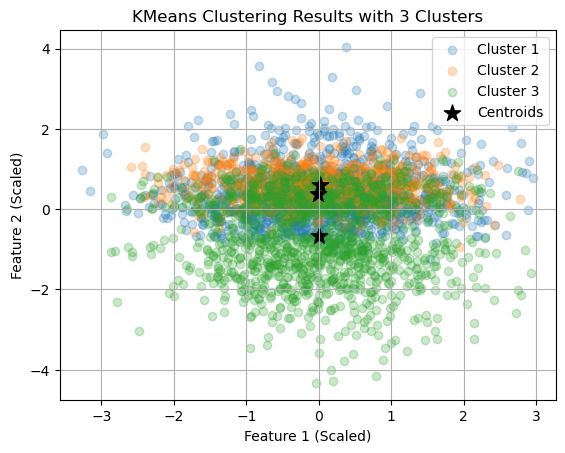

In [13]:
# Setting the number of clusters
n = 3

# Performing KMeans clustering
kmeans = KMeans(n_clusters=n, random_state=2303, n_init=10)
kmeans = kmeans.fit(X_train_scaled)
pclusters = kmeans.predict(X_train_scaled)

# Plotting points for each cluster
for i in range(n):
    plt.scatter(X_train_scaled[pclusters == i, 0], X_train_scaled[pclusters == i, 1], alpha=0.25, label=f'Cluster {i+1}')

# Plotting the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='*', s=150, label='Centroids')

# Adding title, labels, and legend
plt.title(f'KMeans Clustering Results with {n} Clusters')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid()
plt.show()



Choosing 2 clusters 2 Clusters:
 Provides better separation with minimal overlap. Ideal if you prioritize clear grouping over granularity. Matches the 
Choosing 2 clusters silhouette score as the best choice for cohesive clustering.

3 Clusters: Provides finer granularity but introduces more overlap between clusters.

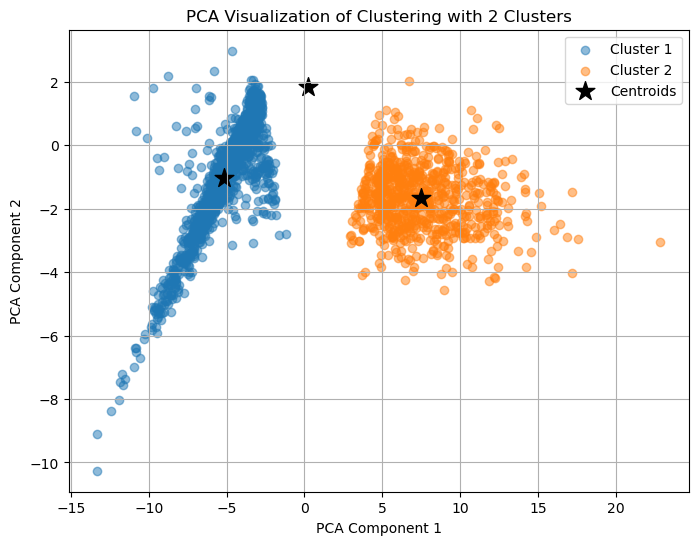

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Performing PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[pclusters == 0, 0], X_pca[pclusters == 0, 1], alpha=0.5, label='Cluster 1')
plt.scatter(X_pca[pclusters == 1, 0], X_pca[pclusters == 1, 1], alpha=0.5, label='Cluster 2')

# Plotting the centroids in the PCA-reduced space
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], color='black', marker='*', s=200, label='Centroids')

# Adding labels, title, and legend
plt.title('PCA Visualization of Clustering with 2 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()


the clusters are relatively well-separated. However, there is noticeable overlap, particularly in the region near the centroid boundary, where the clusters intersect. Whether this is "good enough" depends on your goals

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing: scaling and one-hot encoding
categorical_features = ['var0', 'var1', 'var2']
numerical_features = [col for col in X_train.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Logistic Regression Model with Cross-Validation and Grid Search
logreg = LogisticRegression(max_iter=1000, random_state=2303)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', logreg)
])

# Defining parameter grid for regularization strength
param_grid = {
    'logreg__C': np.logspace(1, 4, 10)  # Regularization strength
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")




Best parameters: {'logreg__C': 10.0}


Accuracy: 0.9263
Precision: 0.9887
Recall: 0.8645

Classification Report:

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.86      0.92       406

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



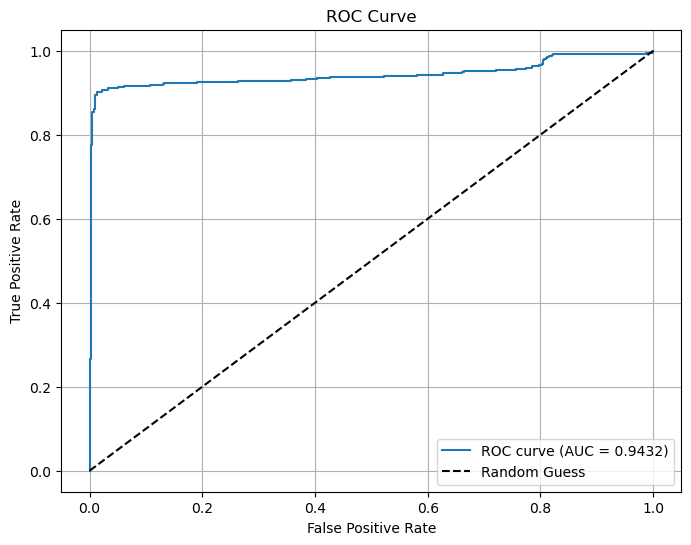

In [16]:
# Evaluating the model on test data
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()



The logistic regression model performs well on a balanced dataset, achieving an accuracy of 92.63%, which reflects the overall correctness of predictions. With a precision of 98.87% and recall of 86.45%, the model is reliable, but some true positives for class 1.0 are missed, indicating a slight recall trade-off. 

ROC Curve:
The ROC curve demonstrates:
A high true positive rate (TPR) for low false positive rates (FPR).
This confirms the model performs well across various classification thresholds.

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [17]:
# Defining categorical and numerical features
categorical_features = ['var0', 'var1', 'var2']
numerical_features = [col for col in X_train.columns if col not in categorical_features]

# Preprocessing data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical data
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # Encode categorical data
    ]
)

# Building the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess data
    ('pca', PCA()),  # Apply PCA
    ('logreg', LogisticRegression(max_iter=1000, random_state=2303))  # Train Logistic Regression
])

# parameter grid
param_grid = {
    'pca__n_components': [1,5, 10, 15, 20, 30, 40],  # Test PCA components
    'logreg__C': np.logspace(-4, 4, 10)  # Test regularization strengths
}

# Performing grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'logreg__C': 2.782559402207126, 'pca__n_components': 10}


Accuracy: 0.9325
Precision: 0.9916
Recall: 0.8744

Classification Report:

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.94       394
         1.0       0.99      0.87      0.93       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



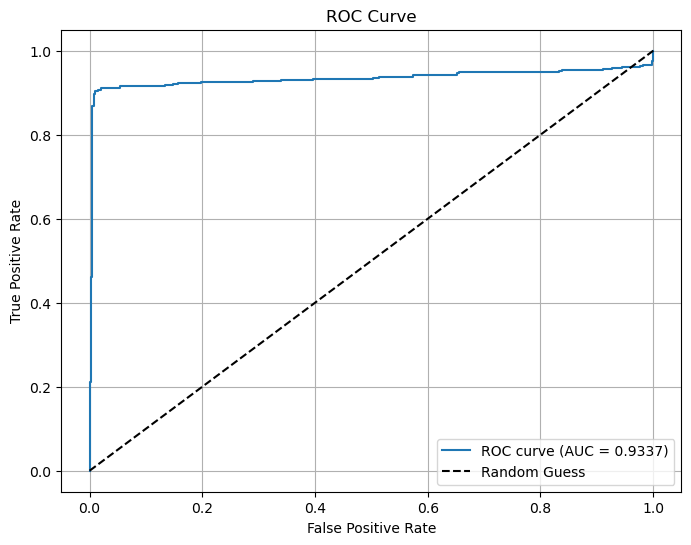

In [18]:
#predicting
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

#  metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Show classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


The logistic regression model performs well on a balanced dataset, achieving an accuracy of 93.25%, which reflects the overall correctness of predictions. With a precision of 99.16% and recall of 87.44%, the model is reliable, but some true positives for class 1.0 are missed, indicating a slight recall trade-off.

ROC Curve: The ROC curve demonstrates a high true positive rate (TPR) for low false positive rates (FPR). This confirms the model performs well across various classification thresholds.

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [22]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np

# Defining categorical and numerical features
categorical_features = ['var0', 'var1', 'var2']
numerical_features = [col for col in X_train.columns if col not in categorical_features]

# Preprocessing data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  
        ('cat', OneHotEncoder(drop='first'), categorical_features) 
    ]
)

# Building the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('kmeans', KMeans(random_state=2303, n_init=10)), 
    ('logreg', LogisticRegression(max_iter=1000, random_state=2303)) 
])

# Defining parameter grid for grid search
param_grid = {
    'kmeans__n_clusters': [2,5,10],  
    'logreg__C': np.logspace(-4, 4, 10) 
}

# Performing grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Getting the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")



Best parameters: {'kmeans__n_clusters': 5, 'logreg__C': 2.782559402207126}


Accuracy: 0.9463
Precision: 0.9946
Recall: 0.8990

Classification Report:

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       394
         1.0       0.99      0.90      0.94       406

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



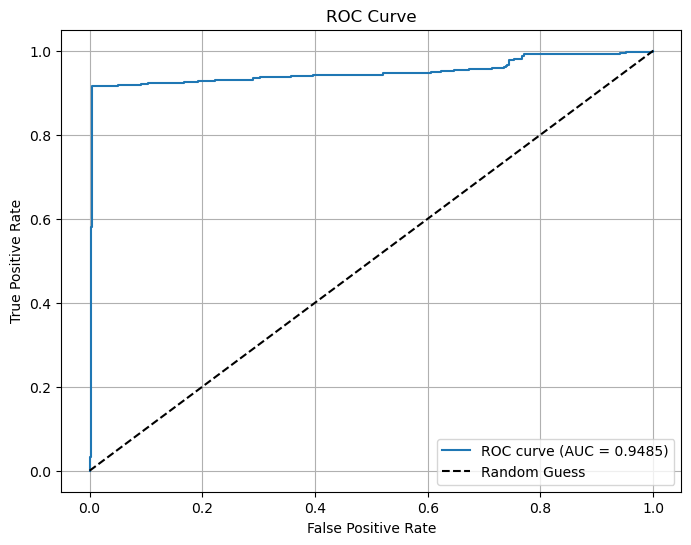

In [23]:

# Predicting on test data
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Showing classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


The logistic regression model with K-means preprocessing performs well, achieving an accuracy of 94.63%, reflecting its overall correctness. With a precision of 99.46% and recall of 89.90%, the model reliably classifies most samples, though it misses a small portion of true positives for class 1.0. The ROC AUC of 0.9485 indicates strong separation between the classes, and the model benefits from the added granularity provided by 5 clusters, as determined through grid search. This approach improves classification accuracy compared to simpler preprocessing methods.


Why we are not using 2-3 which were identified before 

The initial analysis with Elbow, Silhouette, and PCA suggested 2-3 clusters as optimal based on unsupervised clustering quality (compactness and separation). However, grid search with logistic regression optimized for classification accuracy, where 5 clusters provided finer granularity, helping the model capture overlapping patterns better. The interaction between clustering and logistic regression, along with regularization, allowed higher-resolution clusters to improve supervised performance.

Since maximizing classification accuracy is the goal, 5 clusters are considered ; otherwise, sticking  to 2-3 clusters for interpretability also makes sense.


# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

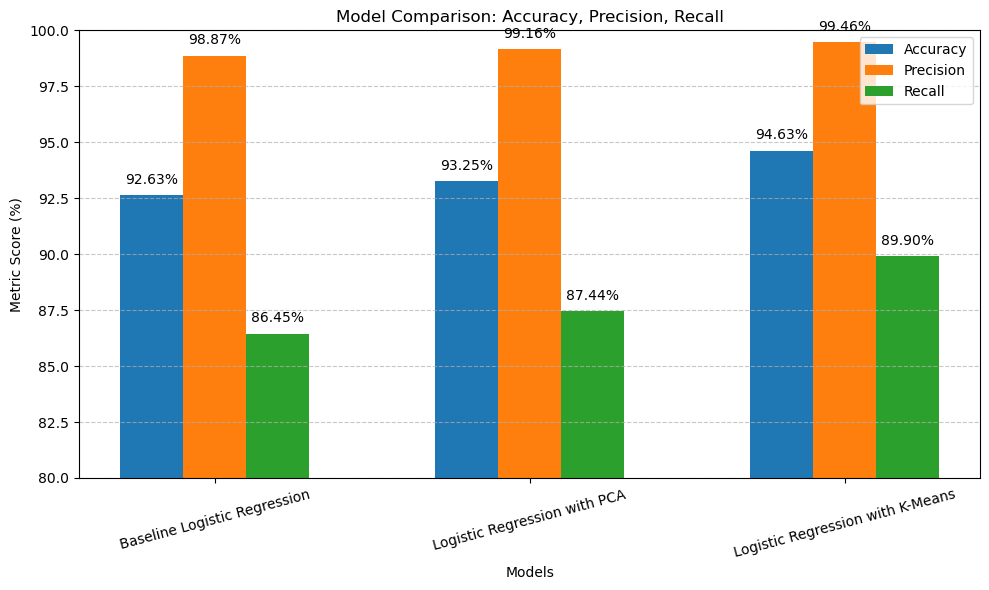

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for the models
baseline_metrics = [0.9263, 0.9887, 0.8645]  # Baseline Logistic Regression
pca_metrics = [0.9325, 0.9916, 0.8744]  # Logistic Regression with PCA
kmeans_metrics = [0.9463, 0.9946, 0.8990]  # Logistic Regression with K-Means

# data into a dictionary for plotting
metrics = {
    'Baseline Logistic Regression': baseline_metrics,
    'Logistic Regression with PCA': pca_metrics,
    'Logistic Regression with K-Means': kmeans_metrics
}

# Extracting data for plotting
models = list(metrics.keys())
accuracy = [m[0] * 100 for m in metrics.values()]  
precision = [m[1] * 100 for m in metrics.values()]  
recall = [m[2] * 100 for m in metrics.values()]  

# Plotting the bar chart
x = np.arange(len(models))  
width = 0.2  

plt.figure(figsize=(10, 6))
plt.bar(x - width, accuracy, width, label='Accuracy')
plt.bar(x, precision, width, label='Precision')
plt.bar(x + width, recall, width, label='Recall')

plt.title('Model Comparison: Accuracy, Precision, Recall')
plt.xlabel('Models')
plt.ylabel('Metric Score (%)')  
plt.xticks(x, models, rotation=15)
plt.ylim(80, 100) 
plt.legend()

# Add percentage values on top of bars
for i, v in enumerate(accuracy):
    plt.text(x[i] - width, v + 0.5, f"{v:.2f}%", ha='center')
for i, v in enumerate(precision):
    plt.text(x[i], v + 0.5, f"{v:.2f}%", ha='center')
for i, v in enumerate(recall):
    plt.text(x[i] + width, v + 0.5, f"{v:.2f}%", ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#  Conclusion
The Logistic Regression with K-Means model performs the best, achieving the highest accuracy (94.63%), precision (99.46%), and recall (89.90%), indicating superior classification performance. The Baseline Logistic Regression has lower recall (86.45%), missing more true positives. The Logistic Regression with PCA improves recall (87.44%) over the baseline but still lags behind the K-Means model. Overall, the K-Means preprocessing adds valuable granularity, making it the most effective choice.


If only 2 clusters are used then Accuracy: 0.8688 Precision: 0.9169 Recall: 0.8153 which makes LogReg with pca the better choice 